O objetivo deste projeto é colocar em prática o estudo de <b>Séries Temporais</b> do <i>Módulo 03</i>. Tomei a decisão de utilizar os dados disponibilizados pelo estado do Rio Grande do Sul em https://ti.saude.rs.gov.br/covid19/ ao invés dos dados do Brasil.io.

Este projeto analisará os dados relativos ao impacto do <i>Covid-19</i> no estado do Rio Grande do Sul.

Importar Bibliotecas

In [532]:
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import autocorrelation_plot

Parâmetros para configurações dos gráficos

In [533]:
mpl.rcParams["font.size"] = 18
mpl.rcParams["figure.figsize"] = (20,8)

### Dicionário de Dados

Dados a partir do site https://ti.saude.rs.gov.br/covid19/, 
opção "Completo" em https://ti.saude.rs.gov.br/covid19/api


Casos Confirmados<br>
COD_IBGE	Código IBGE do Município<br>
MUNICIPIO	Nome do município<br>
COD_REGIAO_COVID	Código da região de saúde COVID<br>
REGIAO_COVID	Nome da regição de saúde COVID<br>
SEXO	Sexo<br>
FAIXAETARIA	Faixa Etária<br>
CRITERIO	Tipo de teste<br>
DATA_CONFIRMACAO	Data de confirmação<br>
DATA_SINTOMAS	Data de início dos sintomas<br>
DATA_INCLUSAO	Data de inclusão no dashboard do RS<br>
DATA_EVOLUCAO	Data da evolução<br>
EVOLUCAO	Descrição da evolução<br>
HOSPITALIZADO	Paciente foi hospitalizado<br>
FEBRE	Sintomas de febre<br>
TOSSE	Sintomas de tosse<br>
GARGANTA	Sintomas de dor de garganta<br>
DISPNEIA	Sintomas de dor de dispnéia/falta de ar<br>
OUTROS	Outros sintomas<br>
CONDICOES	Alguma condição de saúde que necessite atenção<br>
GESTANTE	Paciente é gestante<br>
DATA_INCLUSAO_OBITO	Data de inclusão da informação de óbito<br>
DATA_EVOLUCAO_ESTIMADA	Data da evolução estimada (casos não hospitalizados)<br>
RACA_COR	Raça/Cor<br>
ETNIA_INDIGENA	Etnia indígena<br>
PROFISSIONAL_SAUDE	Profissional de saúde<br>
BAIRRO	Bairro (apenas municípios com mais de 100.000 hab)<br>
SRAG	Paciente apresentou síndrome respiratória aguda grave<br>
FONTE_INFORMACAO	Fonte da informação<br>
PAIS_NASCIMENTO	Pais de nascimento<br>
PES_PRIV_LIBERDADE	Pessoa privada de liberdade

Ler o arquivo com os dados

In [534]:
dados_rs = pd.read_csv("https://github.com/cmattosr/bootcampDS_Projeto03/raw/main/dados/20210701.zip", sep=";")
dados_rs

COD_IBGE  MUNICIPIO  COD_REGIAO_COVID              REGIAO_COVID  \
0          430003     ACEGUÁ                16                BAGE - R22   
1          430003     ACEGUÁ                16                BAGE - R22   
2          430003     ACEGUÁ                16                BAGE - R22   
3          430003     ACEGUÁ                16                BAGE - R22   
4          430003     ACEGUÁ                16                BAGE - R22   
...           ...        ...               ...                       ...   
1215514    432380  XANGRI-LÁ                 3  CAPAO DA CANOA - R04 R05   
1215515    432380  XANGRI-LÁ                 3  CAPAO DA CANOA - R04 R05   
1215516    432380  XANGRI-LÁ                 3  CAPAO DA CANOA - R04 R05   
1215517    432380  XANGRI-LÁ                 3  CAPAO DA CANOA - R04 R05   
1215518    432380  XANGRI-LÁ                 3  CAPAO DA CANOA - R04 R05   

              SEXO FAIXAETARIA                CRITERIO DATA_CONFIRMACAO  \
0        Masculino     60 a 69            TESTE RÁPIDO       04/01/2021   
1        Masculino     50 a 59            TESTE RÁPIDO       05/01/2021   
2        Masculino     20 a 29            TESTE RÁPIDO       04/01/2021   
3         Feminino   80 e mais                  RT-PCR       18/12/2020   
4         Feminino     60 a 69                  RT-PCR       21/12/2020   
...            ...         ...                     ...              ...   
1215514  Masculino     30 a 39                  RT-PCR       08/03/2021   
1215515  Masculino   80 e mais            TESTE RÁPIDO       06/03/2021   
1215516  Masculino     20 a 29  Clínico Epidemiológico       05/04/2021   
1215517  Masculino     60 a 69            TESTE RÁPIDO       21/03/2021   
1215518  Masculino     40 a 49            TESTE RÁPIDO       09/03/2021   

        DATA_SINTOMAS DATA_INCLUSAO  ... DATA_INCLUSAO_OBITO  \
0          02/01/2021    07/01/2021  ...                 NaN   
1          01/01/2021    07/01/2021  ...                 NaN   
2          01/01/2021    07/01/2021  ...                 NaN   
3          15/12/2020    31/12/2020  ...                 NaN   
4          18/12/2020    31/12/2020  ...                 NaN   
...               ...           ...  ...                 ...   
1215514    04/03/2021    01/04/2021  ...                 NaN   
1215515    03/03/2021    10/04/2021  ...                 NaN   
1215516    01/04/2021    06/04/2021  ...                 NaN   
1215517    19/03/2021    07/04/2021  ...                 NaN   
1215518    06/03/2021    07/04/2021  ...                 NaN   

        DATA_EVOLUCAO_ESTIMADA       RACA_COR  ETNIA_INDIGENA  \
0                   16/01/2021         BRANCA  NAO ENCONTRADO   
1                   15/01/2021         BRANCA  NAO ENCONTRADO   
2                   15/01/2021         BRANCA  NAO ENCONTRADO   
3                   29/12/2020         BRANCA  NAO ENCONTRADO   
4                   01/01/2021         BRANCA  NAO ENCONTRADO   
...                        ...            ...             ...   
1215514                    NaN         BRANCA  NAO ENCONTRADO   
1215515             17/03/2021  NAO INFORMADO  NAO ENCONTRADO   
1215516             15/04/2021  NAO INFORMADO  NAO ENCONTRADO   
1215517             02/04/2021         BRANCA  NAO ENCONTRADO   
1215518             20/03/2021  NAO INFORMADO  NAO ENCONTRADO   

        PROFISSIONAL_SAUDE             BAIRRO SRAG FONTE_INFORMACAO  \
0                      NAO           INTERIOR  NAO            E-SUS   
1                      NAO       COLONIA NOVA  NAO            E-SUS   
2                      NAO       COLONIA NOVA  NAO            E-SUS   
3                      NAO       COLONIA NOVA  NAO            E-SUS   
4                      NAO  RINCÃO DOS CRAVOS  NAO            E-SUS   
...                    ...                ...  ...              ...   
1215514      NAO INFORMADO      NAO INFORMADO  SIM       SIVEP HOSP   
1215515                NAO              GUARA  NAO            E-SUS   
121551

Criar outro dataframe para preservar os dados originais, será utilizado o novo dataframe na análises

In [535]:
dados = dados_rs

Excluir as colunas que não serão utilizadas

In [536]:
dados.drop(["COD_IBGE",
            "COD_REGIAO_COVID",
            "REGIAO_COVID",
            "SEXO",
            "FAIXAETARIA",
            "CRITERIO",
           "DATA_SINTOMAS",
            "DATA_INCLUSAO",
            "DATA_EVOLUCAO",
            "EVOLUCAO",
            "HOSPITALIZADO",
            "FEBRE",
           "TOSSE",
           "GARGANTA",
           "DISPNEIA",
           "OUTROS",
           "CONDICOES",
           "GESTANTE",
           "DATA_EVOLUCAO_ESTIMADA",
           "RACA_COR",
           "ETNIA_INDIGENA",
           "PROFISSIONAL_SAUDE",
           "BAIRRO",
           "SRAG",
           "FONTE_INFORMACAO",
           "PAIS_NASCIMENTO",
           "PES_PRIV_LIBERDADE"], axis = 1,  inplace = True)
dados

MUNICIPIO DATA_CONFIRMACAO DATA_INCLUSAO_OBITO
0           ACEGUÁ       04/01/2021                 NaN
1           ACEGUÁ       05/01/2021                 NaN
2           ACEGUÁ       04/01/2021                 NaN
3           ACEGUÁ       18/12/2020                 NaN
4           ACEGUÁ       21/12/2020                 NaN
...            ...              ...                 ...
1215514  XANGRI-LÁ       08/03/2021                 NaN
1215515  XANGRI-LÁ       06/03/2021                 NaN
1215516  XANGRI-LÁ       05/04/2021                 NaN
1215517  XANGRI-LÁ       21/03/2021                 NaN
1215518  XANGRI-LÁ       09/03/2021                 NaN

[1215519 rows x 3 columns]

Mudar os campos de data para o formato de data

In [537]:
dados["DATA_CONFIRMACAO"] = pd.to_datetime(dados["DATA_CONFIRMACAO"], format="%d/%m/%Y")
dados["DATA_INCLUSAO_OBITO"] = pd.to_datetime(dados["DATA_INCLUSAO_OBITO"], format="%d/%m/%Y")
dados.head()

MUNICIPIO DATA_CONFIRMACAO DATA_INCLUSAO_OBITO
0    ACEGUÁ       2021-01-04                 NaT
1    ACEGUÁ       2021-01-05                 NaT
2    ACEGUÁ       2021-01-04                 NaT
3    ACEGUÁ       2020-12-18                 NaT
4    ACEGUÁ       2020-12-21                 NaT

Transformar o dataframe para que tenhamos o número de casos e óbitos por data

In [538]:
dados = dados.groupby("DATA_CONFIRMACAO").count()
#Renomear colunas 
dados.rename(columns={"MUNICIPIO": "Casos Diários", "DATA_INCLUSAO_OBITO": "Óbitos Diários"}, inplace=True)
dados

Casos Diários  Óbitos Diários
DATA_CONFIRMACAO                               
2020-02-26                    1               0
2020-02-29                    1               0
2020-03-01                    8               0
2020-03-02                    4               0
2020-03-03                    3               0
...                         ...             ...
2021-06-25                 1309              17
2021-06-26                  496               7
2021-06-27                  305               2
2021-06-28                  716               2
2021-06-29                   82               1

[487 rows x 2 columns]

### Correlação

Uma das definições de correlação é "a correlação mensura a direção e o grau da relação linear entre duas
variáveis quantitativas" .Serão utilizadas algumas técnicas para a verificação da correlação entre o número de casos e o número de óbito.

- Mapa de calor

In [539]:
sns.heatmap(dados.corr(), annot=True, cmap='Greens')

<AxesSubplot:>

A correlação de 0,85 indica que há uma relação 

- Gráfico de par a par (pairplot)

Uma outra maneira de visualização de correlação é através de gráficos par a par

In [540]:
sns.pairplot(dados)
plt.show()

- Auto-correlação

In [541]:
autocorrelation_plot(dados["Casos Diários"])
plt.title('Auto-correlação de casos diários do Rio Grande do Sul')
plt.show()

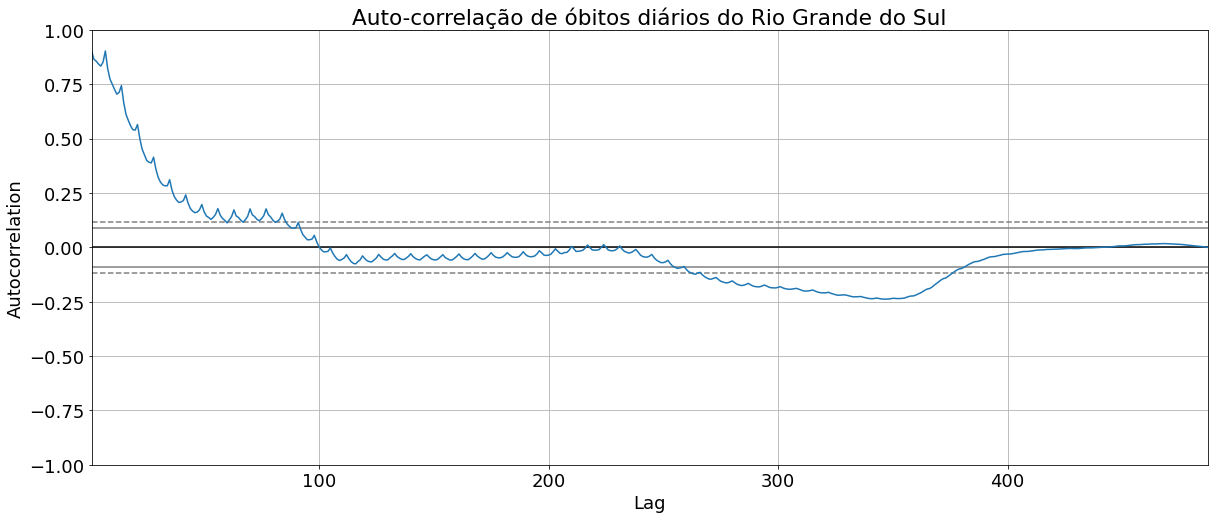

In [542]:
autocorrelation_plot(dados["Óbitos Diários"])
plt.title('Auto-correlação de óbitos diários do Rio Grande do Sul')
plt.show()

Número de casos diários

In [543]:
ax = sns.lineplot(x="DATA_CONFIRMACAO", y="Casos Diários", data=dados)
plt.title('Casos diários de covid no estado do Rio Grande do Sul')
plt.xlabel('Data')
plt.ylabel('Casos Diários')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle = '--')
plt.show()

Número de óbitos diários

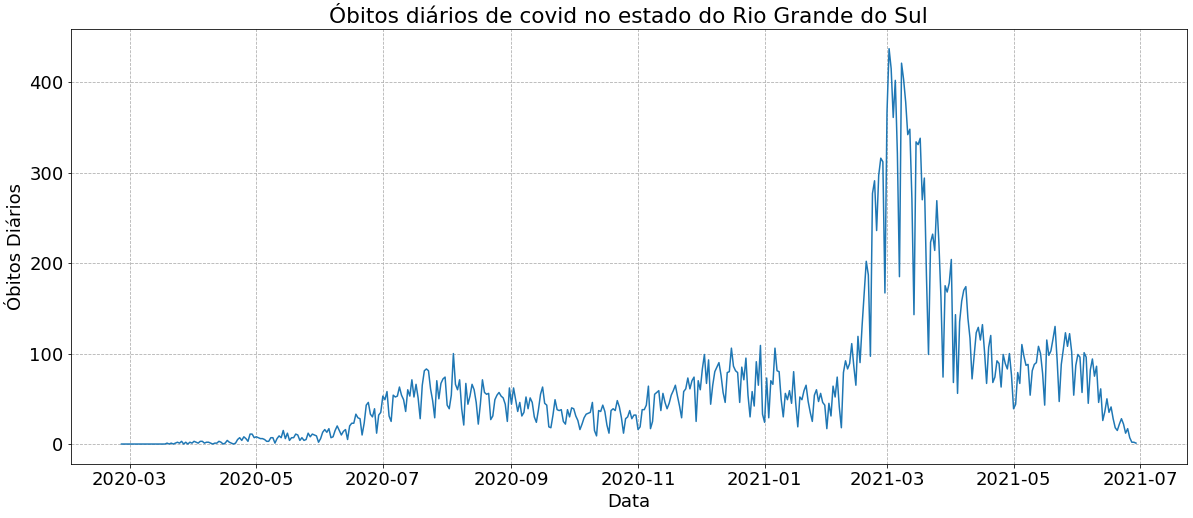

In [544]:
ax = sns.lineplot(x="DATA_CONFIRMACAO", y="Óbitos Diários", data=dados)
plt.title('Óbitos diários de covid no estado do Rio Grande do Sul')
plt.xlabel('Data')
plt.ylabel('Óbitos Diários')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle = '--')
plt.show()

Gerar um dataframe com o acumulado de casos e óbitos

In [545]:
acumulado = dados.cumsum(axis = 0)
acumulado

Casos Diários  Óbitos Diários
DATA_CONFIRMACAO                               
2020-02-26                    1               0
2020-02-29                    2               0
2020-03-01                   10               0
2020-03-02                   14               0
2020-03-03                   17               0
...                         ...             ...
2021-06-25              1213920           31389
2021-06-26              1214416           31396
2021-06-27              1214721           31398
2021-06-28              1215437           31400
2021-06-29              1215519           31401

[487 rows x 2 columns]

Incluir os dados acumulados no dataframe de trabalho

In [546]:
dados = pd.merge(dados, acumulado, how = 'left', on = 'DATA_CONFIRMACAO')
dados.rename(columns={"Casos Diários_x": "Casos Diários", "Óbitos Diários_x": "Óbitos Diários", 
                     "Casos Diários_y": "Casos Acumulados", "Óbitos Diários_y": "Óbitos Acumulados"}, inplace=True)
dados

Casos Diários  Óbitos Diários  Casos Acumulados  \
DATA_CONFIRMACAO                                                    
2020-02-26                    1               0                 1   
2020-02-29                    1               0                 2   
2020-03-01                    8               0                10   
2020-03-02                    4               0                14   
2020-03-03                    3               0                17   
...                         ...             ...               ...   
2021-06-25                 1309              17           1213920   
2021-06-26                  496               7           1214416   
2021-06-27                  305               2           1214721   
2021-06-28                  716               2           1215437   
2021-06-29                   82               1           1215519   

                  Óbitos Acumulados  
DATA_CONFIRMACAO                     
2020-02-26                        0  
2020-02-29                        0  
2020-03-01                        0  
2020-03-02                        0  
2020-03-03                        0  
...                             ...  
2021-06-25                    31389  
2021-06-26                    31396  
2021-06-27                    31398  
2021-06-28                    31400  
2021-06-29                    31401  

[487 rows x 4 columns]

Número de casos acumulados

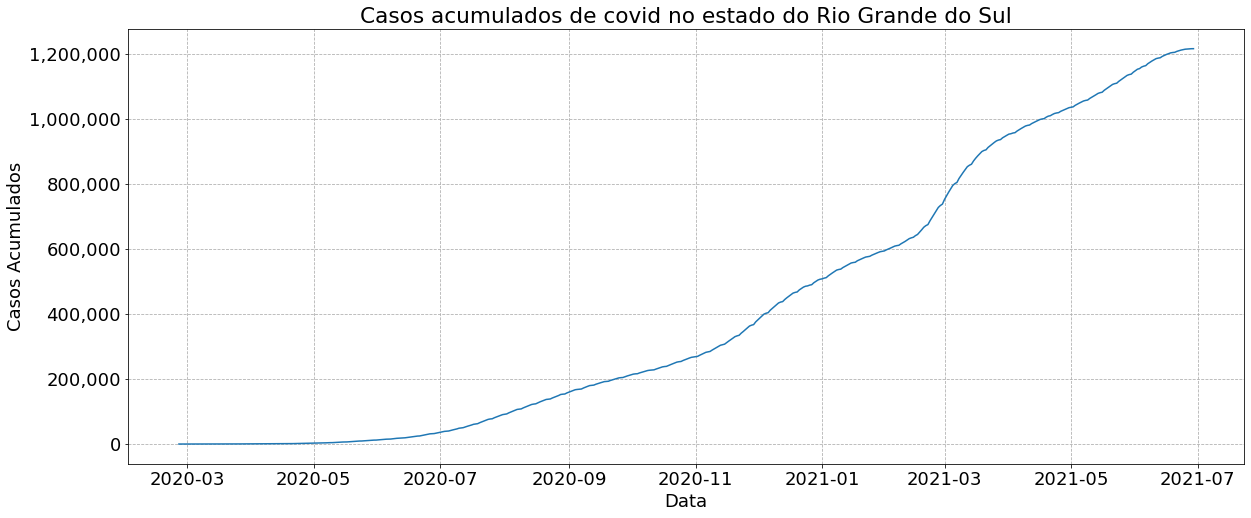

In [547]:
ax = sns.lineplot(x="DATA_CONFIRMACAO", y="Casos Acumulados", data=dados)
plt.title('Casos acumulados de covid no estado do Rio Grande do Sul')
plt.xlabel('Data')
plt.ylabel('Casos Acumulados')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle = '--')
plt.show()

Número de óbitos acumulados

In [548]:
ax = sns.lineplot(x="DATA_CONFIRMACAO", y="Óbitos Acumulados", data=dados)
plt.title('Óbitos acumulados de covid no estado do Rio Grande do Sul')
plt.xlabel('Data')
plt.ylabel('Óbitos Acumulados')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(linestyle = '--')
plt.show()

<b>Diferenciação:</b> é a taxa de crescimento através da diferença entre os pontos
equação da reta y = ax + b, fazendo a diferenciação é encontrado o coeficiente angular da reta

Calcular a diferenciação

In [549]:
dados["Taxa Crescimento Casos"] = dados["Casos Diários"].diff()
dados["Taxa Crescimento Óbitos"] = dados["Óbitos Diários"].diff()
dados

Casos Diários  Óbitos Diários  Casos Acumulados  \
DATA_CONFIRMACAO                                                    
2020-02-26                    1               0                 1   
2020-02-29                    1               0                 2   
2020-03-01                    8               0                10   
2020-03-02                    4               0                14   
2020-03-03                    3               0                17   
...                         ...             ...               ...   
2021-06-25                 1309              17           1213920   
2021-06-26                  496               7           1214416   
2021-06-27                  305               2           1214721   
2021-06-28                  716               2           1215437   
2021-06-29                   82               1           1215519   

                  Óbitos Acumulados  Taxa Crescimento Casos  \
DATA_CONFIRMACAO                                              
2020-02-26                        0                     NaN   
2020-02-29                        0                     0.0   
2020-03-01                        0                     7.0   
2020-03-02                        0                    -4.0   
2020-03-03                        0                    -1.0   
...                             ...                     ...   
2021-06-25                    31389                  -117.0   
2021-06-26                    31396                  -813.0   
2021-06-27                    31398                  -191.0   
2021-06-28                    31400                   411.0   
2021-06-29                    31401                  -634.0   

                  Taxa Crescimento Óbitos  
DATA_CONFIRMACAO                           
2020-02-26                            NaN  
2020-02-29                            0.0  
2020-03-01                            0.0  
2020-03-02                            0.0  
2020-03-03                            0.0  
...                                   ...  
2021-06-25                            5.0  
2021-06-26                          -10.0  
2021-06-27                           -5.0  
2021-06-28                            0.0  
2021-06-29                           -1.0  

[487 rows x 6 columns]

Taxa de crescimento de casos

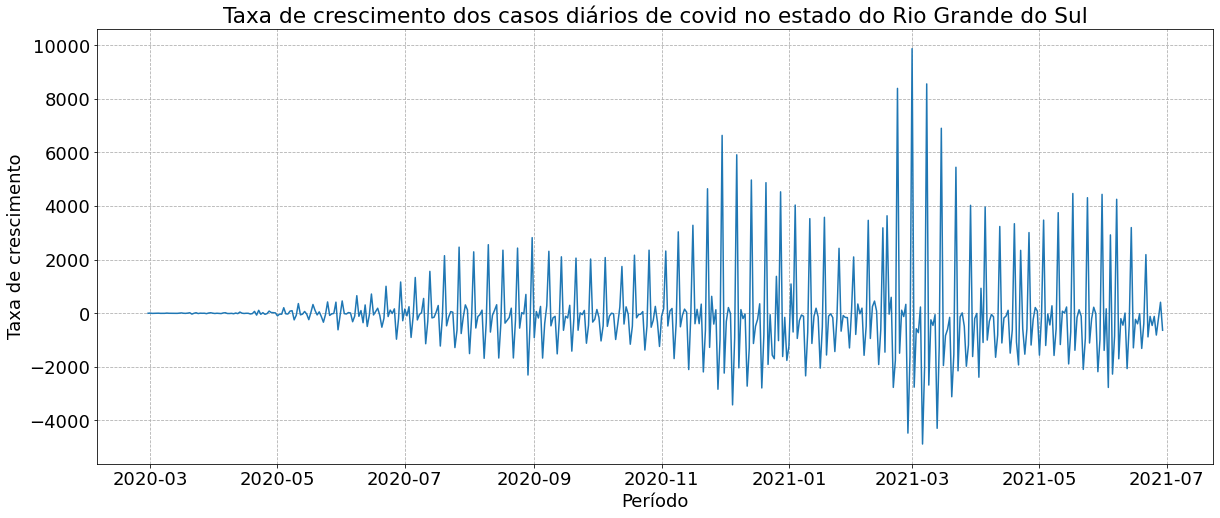

In [550]:
sns.lineplot(x="DATA_CONFIRMACAO", y="Taxa Crescimento Casos", data=dados)
plt.title('Taxa de crescimento dos casos diários de covid no estado do Rio Grande do Sul')
plt.xlabel('Período')
plt.ylabel('Taxa de crescimento')
plt.grid(linestyle = '--')
plt.show()

Taxa de crescimento de óbitos

In [551]:
sns.lineplot(x="DATA_CONFIRMACAO", y="Taxa Crescimento Óbitos", data=dados)
plt.title('Taxa de crescimento de óbitos diários de covid no estado do Rio Grande do Sul')
plt.xlabel('Período')
plt.ylabel('Taxa de crescimento')
plt.grid(linestyle = '--')
plt.show()

### Média móvel

Temos a necessidade de plotar a média para termos uma idea de tendência, será utilizada a média móvel com janela de 7 dias. A média móvel suaviza os picos dos gráficos, tornando a sazonalidade menso abrupta.

In [552]:
dados["Média Móvel Casos"] = dados["Casos Diários"].rolling(window=7, center=False).mean()
dados["Média Móvel Óbitos"] = dados["Óbitos Diários"].rolling(window=7, center=False).mean()
dados

Casos Diários  Óbitos Diários  Casos Acumulados  \
DATA_CONFIRMACAO                                                    
2020-02-26                    1               0                 1   
2020-02-29                    1               0                 2   
2020-03-01                    8               0                10   
2020-03-02                    4               0                14   
2020-03-03                    3               0                17   
...                         ...             ...               ...   
2021-06-25                 1309              17           1213920   
2021-06-26                  496               7           1214416   
2021-06-27                  305               2           1214721   
2021-06-28                  716               2           1215437   
2021-06-29                   82               1           1215519   

                  Óbitos Acumulados  Taxa Crescimento Casos  \
DATA_CONFIRMACAO                                              
2020-02-26                        0                     NaN   
2020-02-29                        0                     0.0   
2020-03-01                        0                     7.0   
2020-03-02                        0                    -4.0   
2020-03-03                        0                    -1.0   
...                             ...                     ...   
2021-06-25                    31389                  -117.0   
2021-06-26                    31396                  -813.0   
2021-06-27                    31398                  -191.0   
2021-06-28                    31400                   411.0   
2021-06-29                    31401                  -634.0   

                  Taxa Crescimento Óbitos  Média Móvel Casos  \
DATA_CONFIRMACAO                                               
2020-02-26                            NaN                NaN   
2020-02-29                            0.0                NaN   
2020-03-01                            0.0                NaN   
2020-03-02                            0.0                NaN   
2020-03-03                            0.0                NaN   
...                                   ...                ...   
2021-06-25                            5.0        1609.571429   
2021-06-26                          -10.0        1526.142857   
2021-06-27                           -5.0        1470.857143   
2021-06-28                            0.0        1161.714286   
2021-06-29                           -1.0         888.000000   

                  Média Móvel Óbitos  
DATA_CONFIRMACAO                      
2020-02-26                       NaN  
2020-02-29                       NaN  
2020-03-01                       NaN  
2020-03-02                       NaN  
2020-03-03                       NaN  
...                              ...  
2021-06-25                 19.142857  
2021-06-26                 17.571429  
2021-06-27                 15.714286  
2021-06-28                 12.857143  
2021-06-29                  9.000000  

[487 rows x 8 columns]

In [553]:
sns.lineplot(x="DATA_CONFIRMACAO", y="Casos Diários", data=dados)
sns.lineplot(x="DATA_CONFIRMACAO", y="Média Móvel Casos", data=dados, color="red")
plt.title('Média móvel (7 dias) dos casos de covid no estado do Rio Grande do Sul')
plt.xlabel('Período')
plt.ylabel('Número de casos')
plt.grid(linestyle = '--')
plt.show()

In [554]:
sns.lineplot(x="DATA_CONFIRMACAO", y="Óbitos Diários", data=dados)
sns.lineplot(x="DATA_CONFIRMACAO", y="Média Móvel Óbitos", data=dados, color="red")
plt.title('Média móvel (7 dias) de óbitos no estado do Rio Grande do Sul')
plt.xlabel('Período')
plt.ylabel('Óbitos')
plt.grid(linestyle = '--')
plt.show()

### Correlação entre número de casos e óbitos

<AxesSubplot:xlabel='Casos Diários', ylabel='Óbitos Diários'>

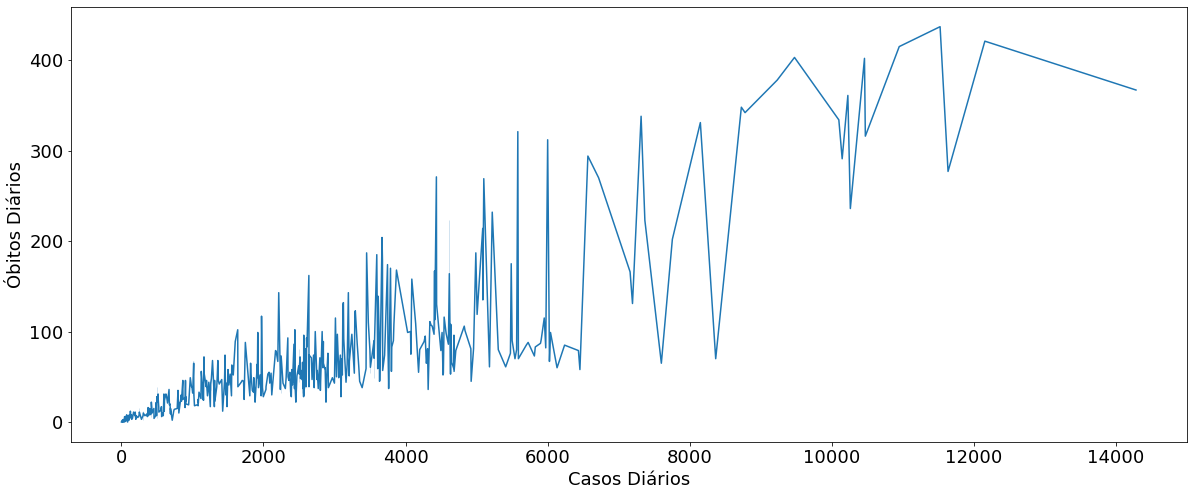

In [555]:
#correlação entre casos novos e óbitos
sns.lineplot(x="Casos Diários", y="Óbitos Diários", data=dados)

Há uma hipótese de que casos novos demorariam alguns dias para ocasionar óbitos, portanto haveria uma janela de dias entre essas ocorrências, iremos mover a coluna de óbitos alguns dias e verificar a correlação (usando _shift_)

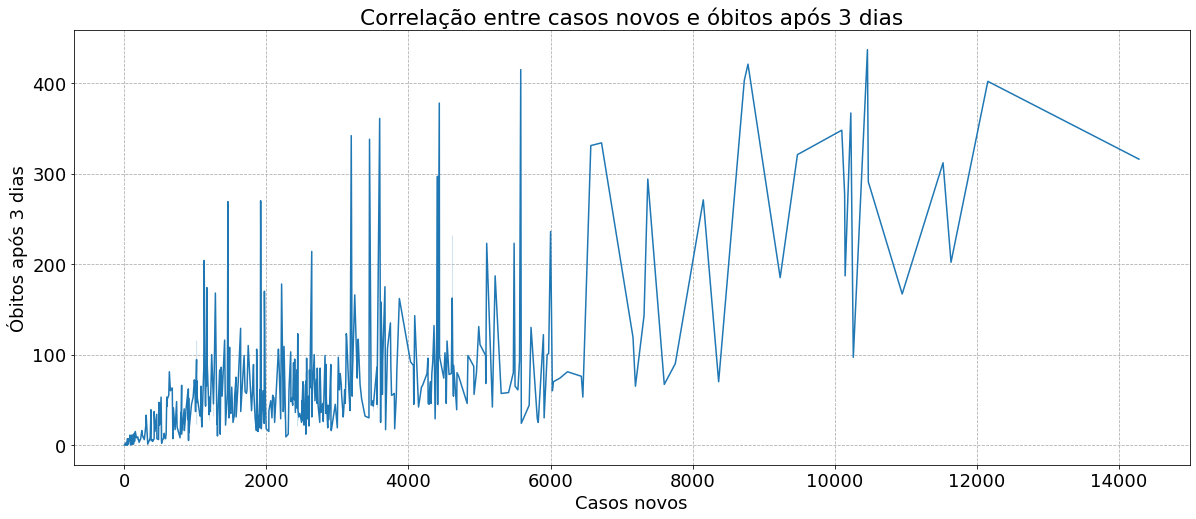

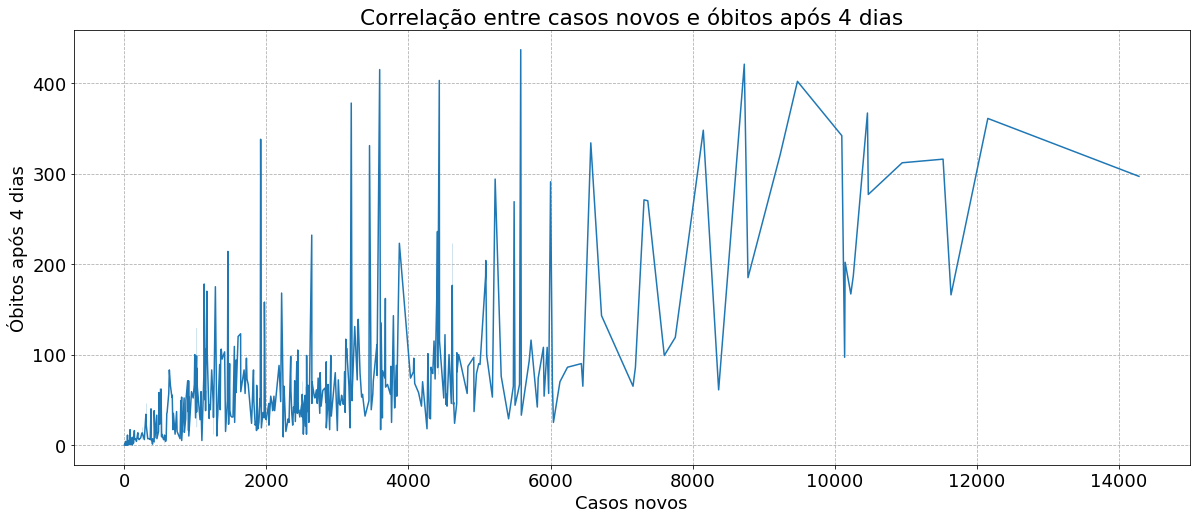

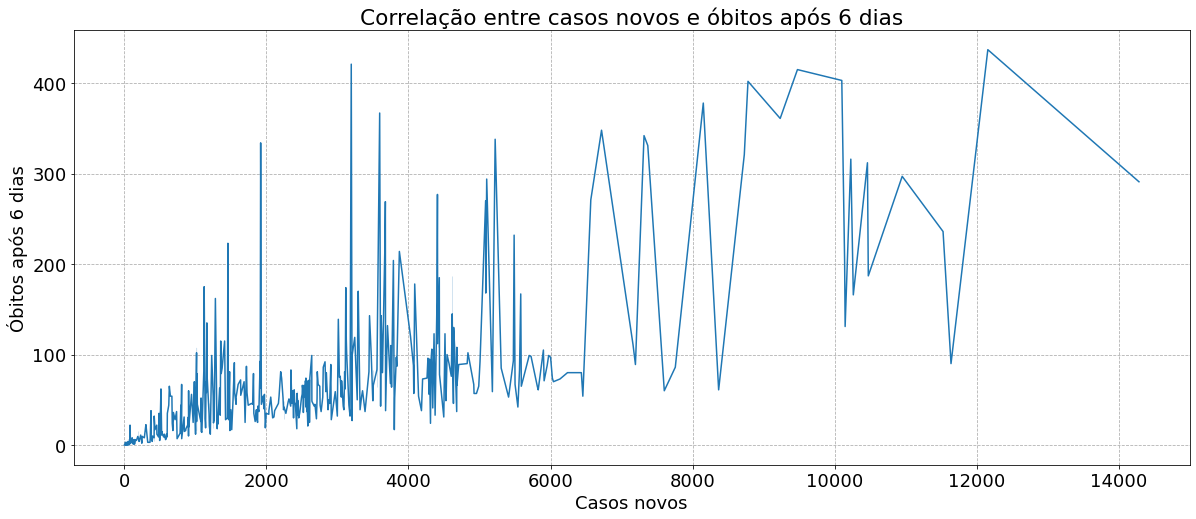

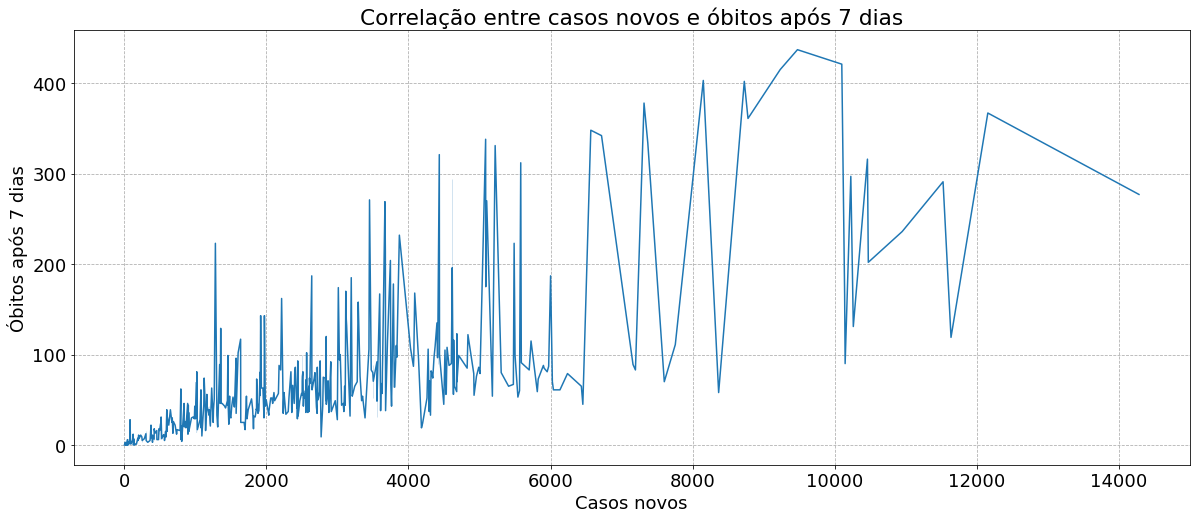

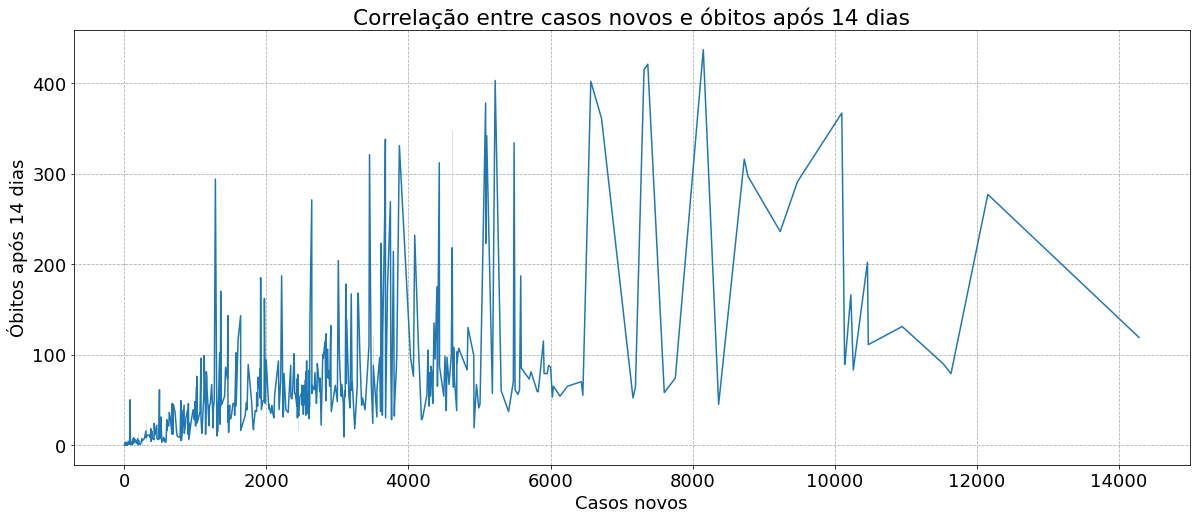

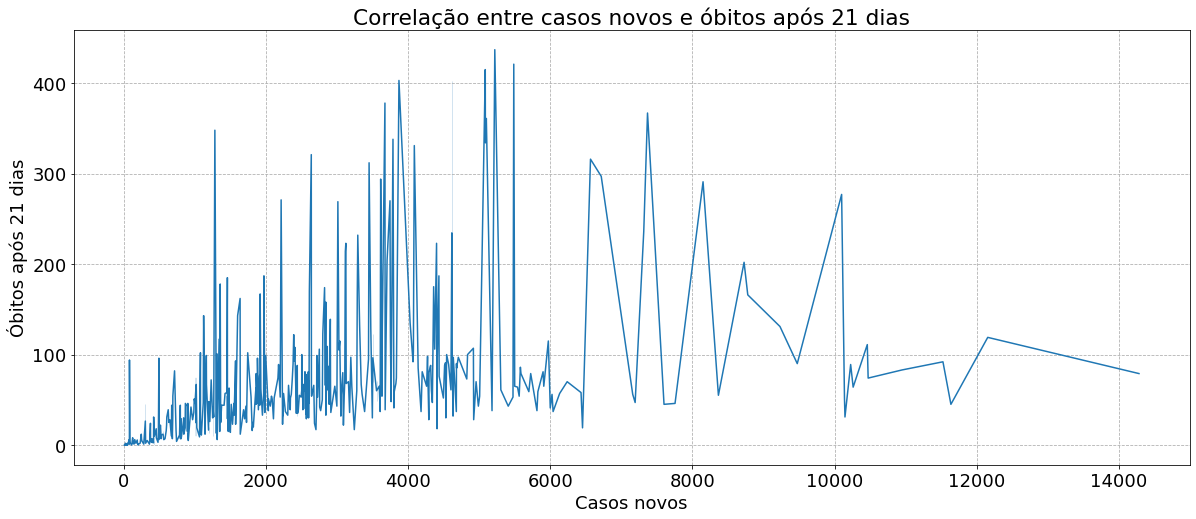

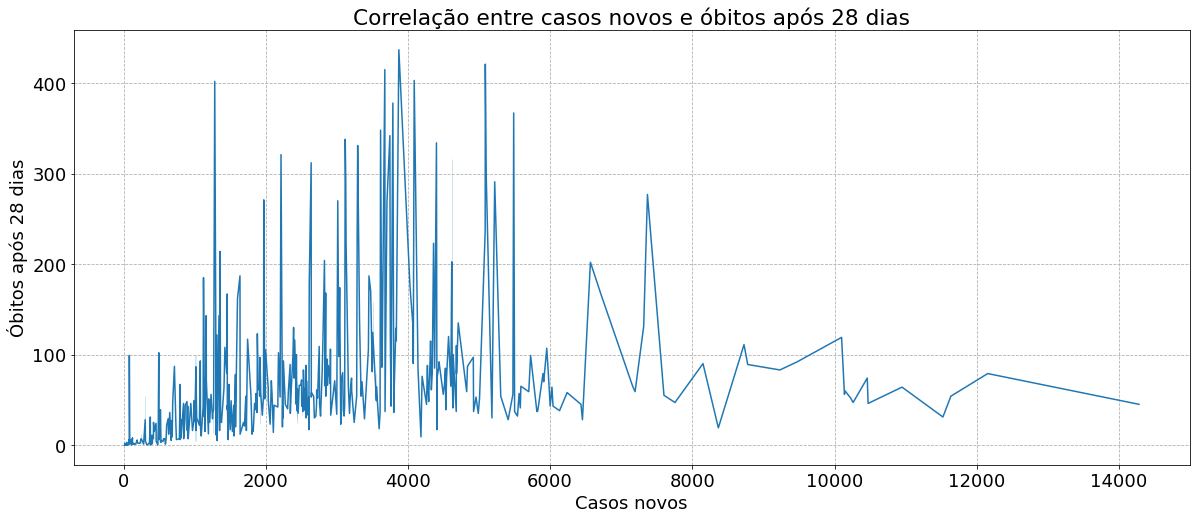

In [556]:
janela_de_dias = [2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 21, 28]
for dias in janela_de_dias:
    dados["janela"] = dados['Óbitos Diários'].shift(dias)
    sns.lineplot(x="Casos Diários", y="janela", data=dados)
    plt.title(f'Correlação entre casos novos e óbitos após {dias} dias')
    plt.xlabel('Casos novos')
    plt.ylabel(f'Óbitos após {dias} dias')
    plt.grid(linestyle = '--')
    plt.show()

### Sazonalidade

Séries temporais com a biblioteca do Facebook <b>Prophet</b>

Importar o prophet

In [557]:
import prophet

É necessário criar um novo dataframe porque o Prophet precisa dos dados de uma determinada maneira

In [558]:
df_casos = pd.DataFrame()

Criar uma coluna com a informação de tempo, com esse nome específico "ds", para isso é necessário que essa coluna não seja índice

In [559]:
dados.reset_index(inplace=True)
#criar a coluna "ds"
df_casos["ds"] = dados["DATA_CONFIRMACAO"]

Criar a coluna alvo, que é o que queremos prever (no nosso caso, o número de casos e óbitos de covid). O nome deve ser "y"

In [560]:
df_casos["y"] = dados["Casos Diários"]

Criar o modelo de Machinne Learning do Prophet

In [561]:
modelo_casos = prophet.Prophet()

Fit, ajuste do modelo aos nossos dados

In [562]:
modelo_casos.fit(df_casos)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Aqui é importante observar que o prophet desabilitou a sazonalidade anual e diária automaticamente (informado nas mensagens de output)

Para visualizar a previsão é preciso criar um dataframe com o período desejado, no caso definido como 30 dias

In [563]:
dataframefuturo_casos = modelo_casos.make_future_dataframe(periods=30)
dataframefuturo

ds
0   2020-02-26
1   2020-02-29
2   2020-03-01
3   2020-03-02
4   2020-03-03
..         ...
482 2021-06-25
483 2021-06-26
484 2021-06-27
485 2021-06-28
486 2021-06-29

[487 rows x 1 columns]

Fazer a previsão para o período desejado

In [564]:
previsao_casos = modelo_casos.predict(dataframefuturo_casos)
previsao_casos

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-02-26  -662.620672 -2156.500919  1533.611409  -662.620672   
1   2020-02-29  -618.252169 -3424.762789   101.895774  -618.252169   
2   2020-03-01  -603.462668 -3920.591925  -319.546769  -603.462668   
3   2020-03-02  -588.673167 -1341.743214  2452.818351  -588.673167   
4   2020-03-03  -573.883666 -2058.447272  1716.267465  -573.883666   
..         ...          ...          ...          ...          ...   
512 2021-07-25  1869.210401 -1413.383743  2079.654202  1835.855222   
513 2021-07-26  1847.527907  1064.750192  4685.357987  1811.072265   
514 2021-07-27  1825.845413   336.630517  4044.288430  1785.852950   
515 2021-07-28  1804.162919   502.386587  4136.678509  1761.699216   
516 2021-07-29  1782.480424   258.762481  3861.967568  1737.016754   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    -662.620672      412.092278            412.092278            412.092278   
1    -618.252169    -1069.143952          -1069.143952          -1069.143952   
2    -603.462668    -1529.003784          -1529.003784          -1529.003784   
3    -588.673167     1129.516132           1129.516132           1129.516132   
4    -573.883666      435.700592            435.700592            435.700592   
..           ...             ...                   ...                   ...   
512  1906.826294    -1529.003784          -1529.003784          -1529.003784   
513  1887.697448     1129.516132           1129.516132           1129.516132   
514  1868.587429      435.700592            435.700592            435.700592   
515  1849.812336      412.092278            412.092278            412.092278   
516  1830.134844      299.871186            299.871186            299.871186   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     412.092278    412.092278    412.092278                   0.0   
1   -1069.143952  -1069.143952  -1069.143952                   0.0   
2   -1529.003784  -1529.003784  -1529.003784                   0.0   
3    1129.516132   1129.516132   1129.516132                   0.0   
4     435.700592    435.700592    435.700592                   0.0   
..           ...           ...           ...                   ...   
512 -1529.003784  -1529.003784  -1529.003784                   0.0   
513  1129.516132   1129.516132   1129.516132                   0.0   
514   435.700592    435.700592    435.700592                   0.0   
515   412.092278    412.092278    412.092278                   0.0   
516   299.871186    299.871186    299.871186                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  -250.528394  
1                           0.0                         0.0 -1687.396121  
2                           0.0                         0.0 -2132.466452  
3                           0.0                         0.0   540.842965  
4                           0.0                         0.0  -138.183074  
..                          ...                         ...          ...  
512                         0.0                         0.0   340.206617  
513                         0.0                         0.0  2977.044040  
514                         0.0                         0.0  2261.546005  
515                         0.0                         0.0  2216.255197  
516                         0.0                         0.0  2082.351610  

[517 rows x 16 columns]

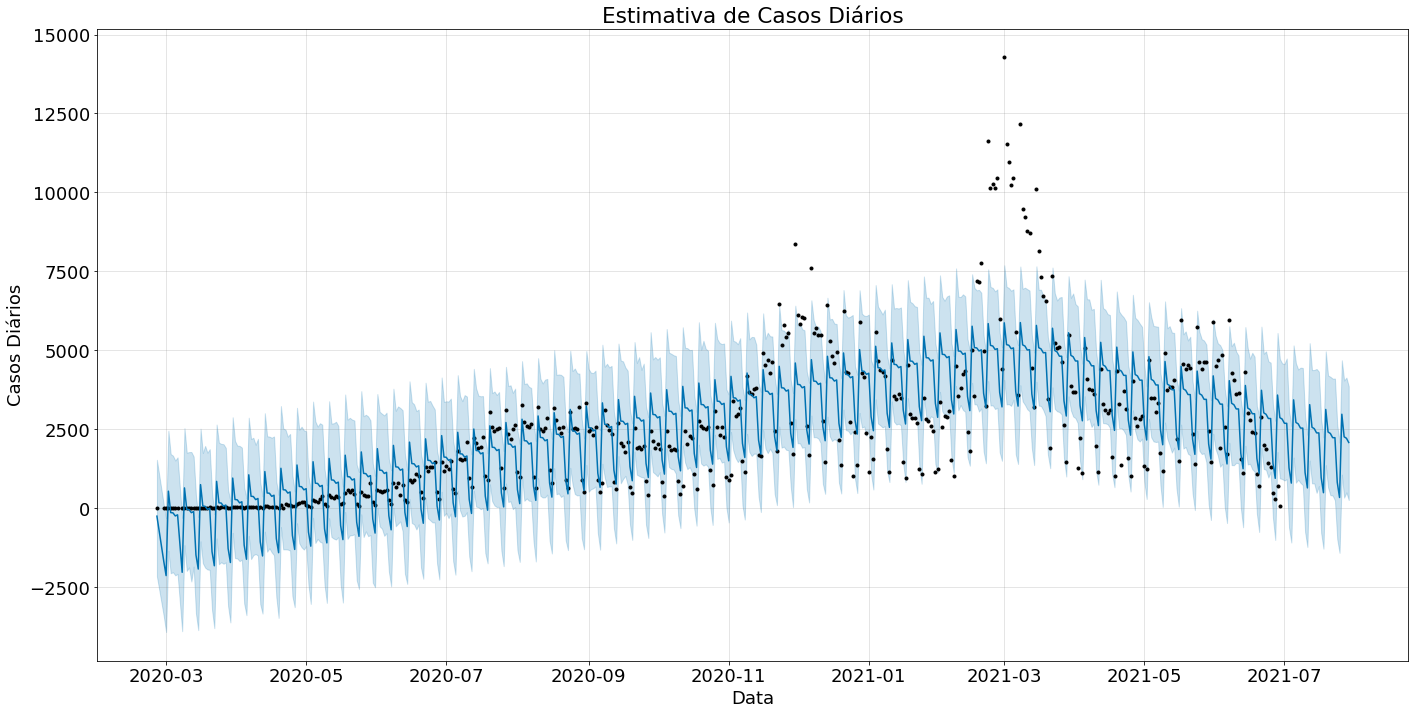

In [565]:
#a estimativa ou previsão está na coluna yhat
modelo_casos.plot(previsao_casos, xlabel = "Data", ylabel = "Casos Diários", figsize=(20,10));
plt.title("Estimativa de Casos Diários")
plt.show()

In [566]:
dados.shape

(487, 10)

É necessário dividir nossos dados em dados de treino e dados de teste para a utilização do prophet para previsão de dados. Atualmente temos 487 dias no dataframe dados, a decisão é deixar 440 dias para treino e 47 dias para teste

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


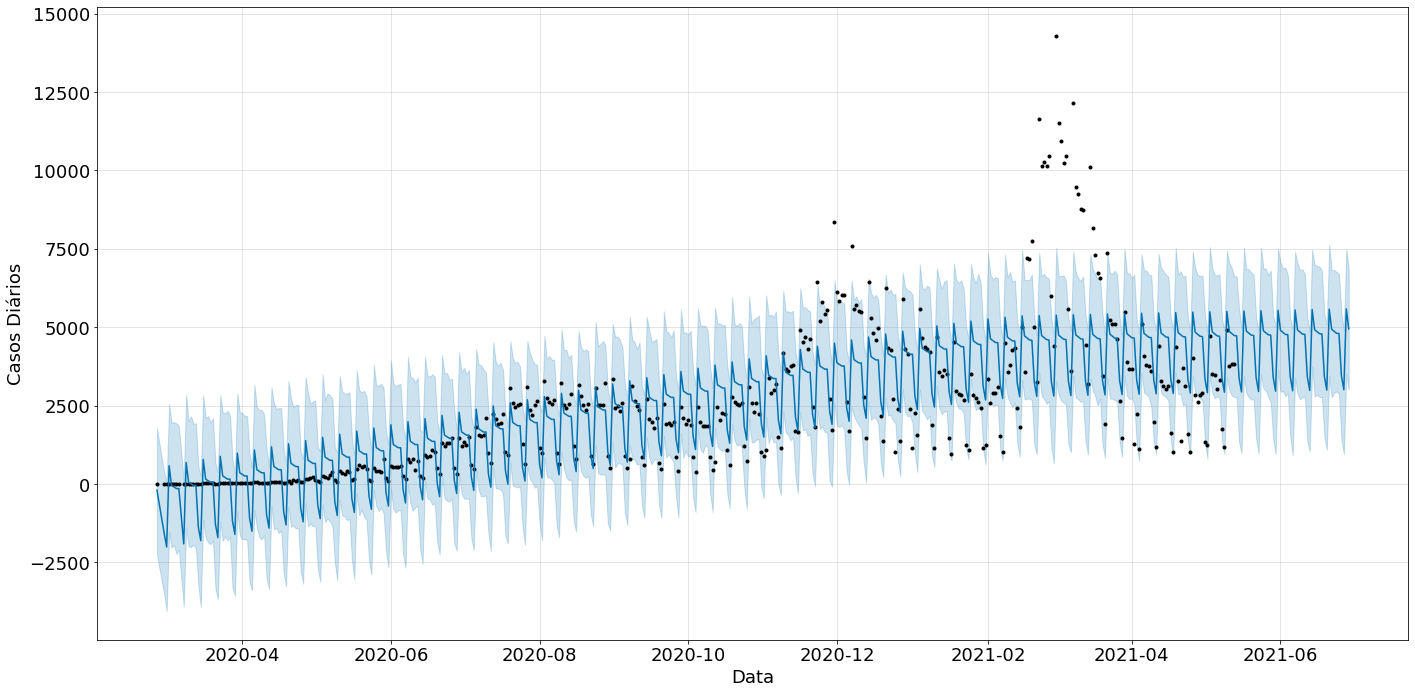

In [567]:
df2_casos = pd.DataFrame()
df2_casos["ds"] = dados["DATA_CONFIRMACAO"][:440]
df2_casos["y"] = dados["Casos Diários"][:440]
modelo2_casos = prophet.Prophet()
modelo2_casos.fit(df2_casos)
dataframefuturo2_casos = modelo2_casos.make_future_dataframe(periods=47)
previsao2_casos = modelo2_casos.predict(dataframefuturo2_casos)
modelo2_casos.plot(previsao2_casos, xlabel = "Data", ylabel = "Casos Diários", figsize=(20,10));

Será criado o dataframe com os 87 dados de teste

In [568]:
#vamos criar o dataframe com os dados de teste
df2_casos_teste = pd.DataFrame()
df2_casos_teste["ds"] = dados["DATA_CONFIRMACAO"][440:]
df2_casos_teste["y"] = dados["Casos Diários"][440:]

Uma vez treinado o modelo com os dados de treino ele será comparado com os dados de teste

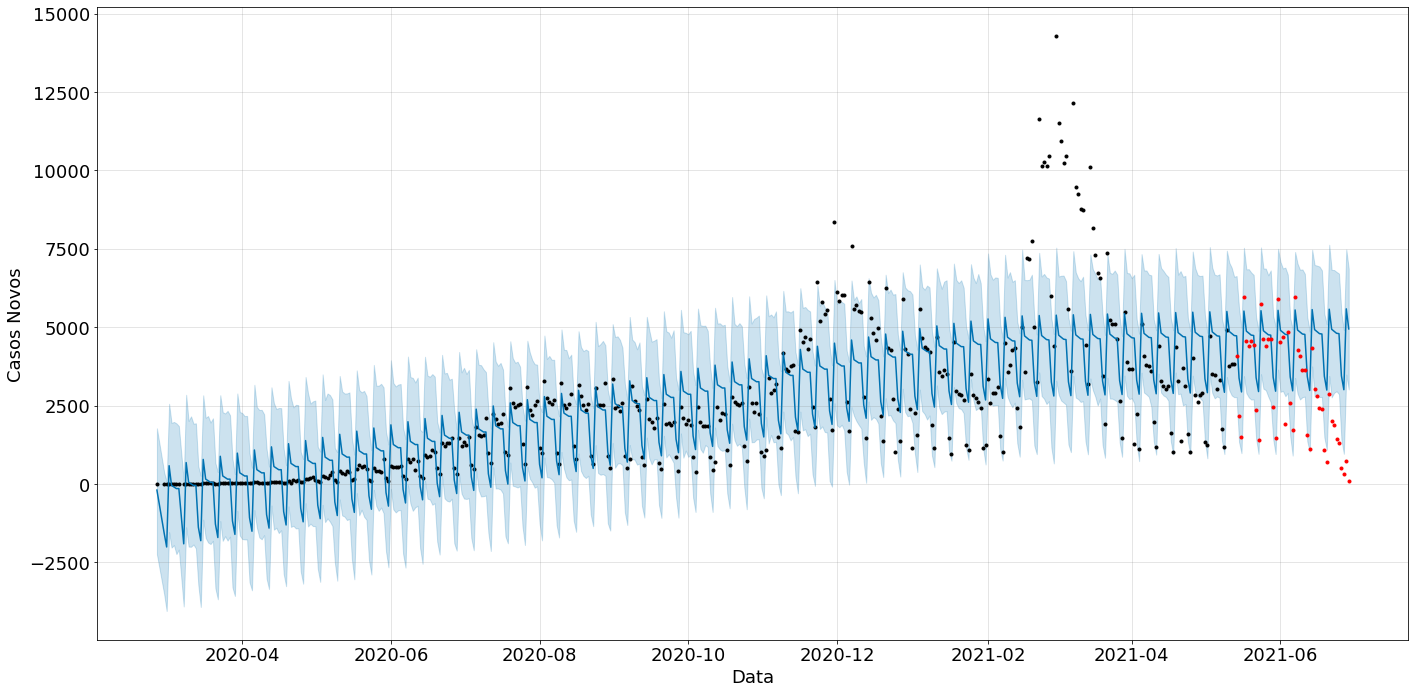

In [569]:
modelo2_casos.plot(previsao2_casos, xlabel = "Data", ylabel = "Casos Novos", figsize=(20,10));
plt.plot(df2_casos_teste["ds"], df2_casos_teste["y"], ".r")
plt.show()

Para visualizar as informações que o prophet está extraindo dos nossos dados é necessário plotar os gráficos do <i>plot_components</i>. 

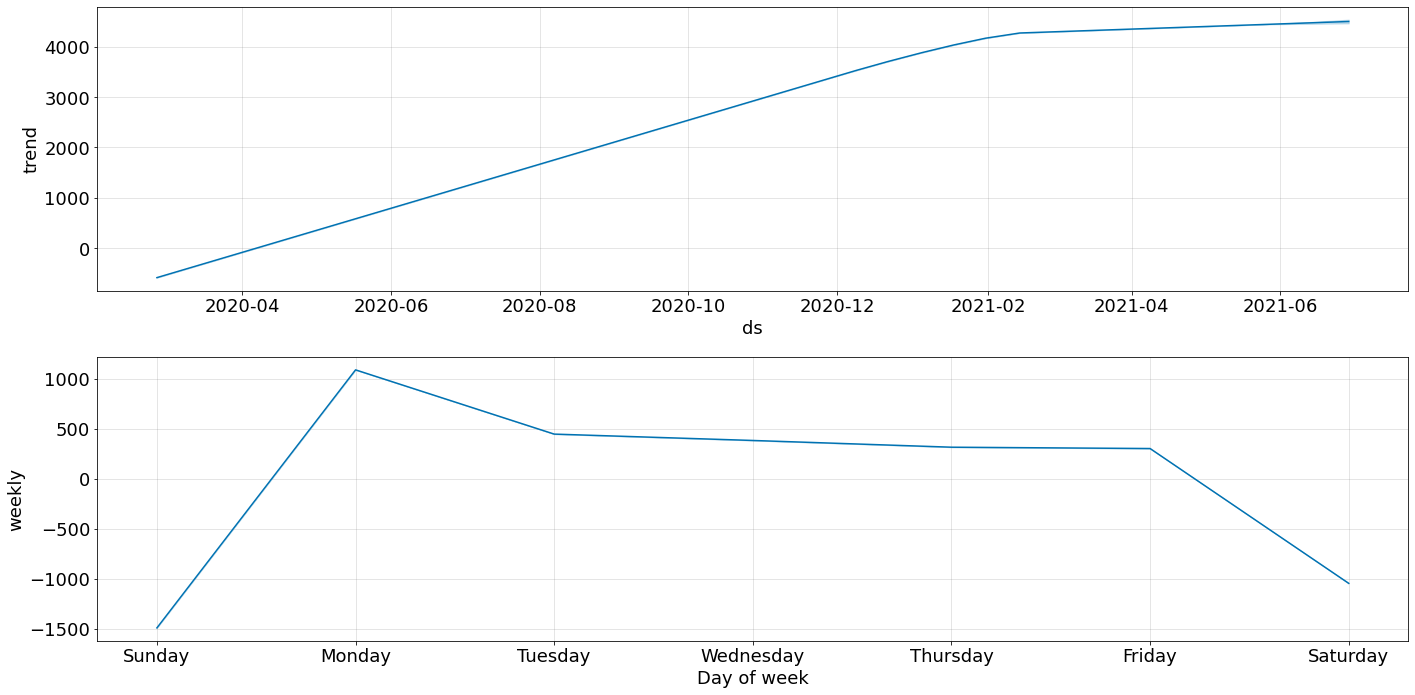

In [570]:
modelo2_casos.plot_components(previsao2_casos, figsize=(20,10));
plt.show()

É possível observar que o prophet automaticamente detectou uma sazonalidade semanal, no segundo gráfico

### Ajustes no modelo

In [571]:
#importar outra funcionalidade do prophet
from prophet.plot import add_changepoints_to_plot

O prophet detectará automaticamente possíveis changepoints (pontos de mudanças de tendência)

In [572]:
fig = modelo2_casos.plot(previsao2_casos, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), modelo2_casos, previsao2_casos)

Colocar mais changepoints no gráfico através do parâmetro <i>changepoint_prior_scale</i> que nos dará uma maior flexibilidade de opções nos changepoints

In [573]:
modelo = prophet.Prophet(n_changepoints = 25, changepoint_prior_scale=10.0)
modelo.fit(df2_casos)
dataframefuturo = modelo.make_future_dataframe(periods=47)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
